In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [2]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['MgCl2 Salt Mass E'] = peakLoad['Peak Load']/0.193056
peakLoad['MgCl2 Salt Mass P'] = peakLoad['Peak Load']/0.084767892
peakLoad['MgCl2 Salt Mass'] = peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E'], axis=1)

peakLoad['K2CO3 Salt Mass E'] = peakLoad['Peak Load']/0.186111
peakLoad['K2CO3 Salt Mass P'] = peakLoad['Peak Load']/1.646738256
peakLoad['K2CO3 Salt Mass'] = peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E'], axis=1)

peakLoad['SrBr2 Salt Mass E'] = peakLoad['Peak Load']/0.3556
peakLoad['SrBr2 Salt Mass P'] = peakLoad['Peak Load']/0.811253581
peakLoad['SrBr2 Salt Mass'] = peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,1,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495
1,2,20.164945,41411.346548,0.234433,71.693170,237.884232,108.349022,56.706819
2,3,18.771555,36953.435376,0.224725,66.739200,221.446522,100.862146,52.788400
3,4,16.617412,31673.736508,0.217586,59.080496,196.034272,89.287640,46.730630
4,5,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
...,...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,143.799328,65.496214,34.278869
396,397,12.662940,24918.728631,0.224640,45.021018,149.383689,68.039720,35.610069
397,398,4.833286,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917
398,399,14.577960,28841.437895,0.225848,51.829559,171.975025,78.329386,40.995389


In [3]:
rate = 'Fixed_Rate'
size = 'Opt_Size'

In [4]:
# Total costs:
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_MgSO4 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
cost_MgCl2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
cost_K2CO3 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
cost_SrBr2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_MgSO4 = cost_MgSO4.rename(columns={'Unnamed: 0': 'building id'})
cost_MgSO4 = cost_MgSO4.sort_values(by=['building id'])
cost_MgSO4 = cost_MgSO4.reset_index()
cost_MgSO4 = cost_MgSO4[['building id', 'total cost ($)']]

cost_MgCl2 = cost_MgCl2.rename(columns={'Unnamed: 0': 'building id'})
cost_MgCl2 = cost_MgCl2.sort_values(by=['building id'])
cost_MgCl2 = cost_MgCl2.reset_index()
cost_MgCl2 = cost_MgCl2[['building id', 'total cost ($)']]

cost_K2CO3 = cost_K2CO3.rename(columns={'Unnamed: 0': 'building id'})
cost_K2CO3 = cost_K2CO3.sort_values(by=['building id'])
cost_K2CO3 = cost_K2CO3.reset_index()
cost_K2CO3 = cost_K2CO3[['building id', 'total cost ($)']]

cost_SrBr2 = cost_SrBr2.rename(columns={'Unnamed: 0': 'building id'})
cost_SrBr2 = cost_SrBr2.sort_values(by=['building id'])
cost_SrBr2 = cost_SrBr2.reset_index()
cost_SrBr2 = cost_SrBr2[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - MgSO4'] = cost_MgSO4['total cost ($)']
cost_impacts_TES['total cost - MgCl2'] = cost_MgCl2['total cost ($)']
cost_impacts_TES['total cost - K2CO3'] = cost_K2CO3['total cost ($)']
cost_impacts_TES['total cost - SrBr2'] = cost_SrBr2['total cost ($)']

cost_impacts_TES['cost saving - MgSO4'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgSO4']
cost_impacts_TES['cost saving % - MgSO4'] = cost_impacts_TES['cost saving - MgSO4']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - MgCl2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgCl2']
cost_impacts_TES['cost saving % - MgCl2'] = cost_impacts_TES['cost saving - MgCl2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - K2CO3'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - K2CO3']
cost_impacts_TES['cost saving % - K2CO3'] = cost_impacts_TES['cost saving - K2CO3']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - SrBr2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - SrBr2']
cost_impacts_TES['cost saving % - SrBr2'] = cost_impacts_TES['cost saving - SrBr2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['peak load'] = peakLoad['Peak Load']
cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,cost saving - K2CO3,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2,peak load
0,1,3526.290877,3411.853730,3421.667666,3465.153973,3466.088070,114.437147,0.032453,104.623211,0.029669,61.136904,0.017337,60.202807,0.017073,27.724174
1,2,2523.385394,2439.361398,2446.430117,2478.064695,2478.750342,84.023996,0.033298,76.955277,0.030497,45.320699,0.017960,44.635052,0.017689,20.164945
2,3,2254.533101,2175.504185,2182.354188,2212.550478,2213.221329,79.028916,0.035053,72.178913,0.032015,41.982623,0.018621,41.311773,0.018324,18.771555
3,4,1938.359969,1868.762140,1874.672865,1900.996197,1901.580105,69.597829,0.035906,63.687104,0.032856,37.363772,0.019276,36.779864,0.018975,16.617412
4,5,3591.834993,3476.731842,3486.818524,3531.145281,3532.079962,115.103151,0.032046,105.016469,0.029238,60.689712,0.016897,59.755031,0.016636,27.902137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,1391.556349,1410.631561,1410.867715,49.592401,0.034513,45.363774,0.031570,26.288562,0.018295,26.052408,0.018131,12.189566
396,397,1535.499790,1487.147655,1491.225089,1509.435847,1509.701162,48.352134,0.031490,44.274701,0.028834,26.063943,0.016974,25.798628,0.016801,12.662940
397,398,491.584576,473.586949,475.106841,481.862989,482.004724,17.997627,0.036611,16.477736,0.033520,9.721587,0.019776,9.579853,0.019488,4.833286
398,399,1766.304961,1707.027850,1712.075523,1734.692888,1735.172304,59.277111,0.033560,54.229438,0.030702,31.612073,0.017897,31.132656,0.017626,14.577960


In [5]:
# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()
diff_all_cost_MgSO4 = cost_impacts_TES["cost saving - MgSO4"].sum()
diff_all_cost_MgCl2 = cost_impacts_TES["cost saving - MgCl2"].sum()
diff_all_cost_K2CO3 = cost_impacts_TES["cost saving - K2CO3"].sum()
diff_all_cost_SrBr2 = cost_impacts_TES["cost saving - SrBr2"].sum()

pct_cost_saving_MgSO4 = diff_all_cost_MgSO4/tot_cost_noTES
pct_cost_saving_MgCl2 = diff_all_cost_MgCl2/tot_cost_noTES
pct_cost_saving_K2CO3 = diff_all_cost_K2CO3/tot_cost_noTES
pct_cost_saving_SrBr2 = diff_all_cost_SrBr2/tot_cost_noTES

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9
cost_impacts_TES
diff_all_cost_SrBr2, pct_cost_saving_SrBr2

(10840.122170593404, 0.018332008159588378)

In [6]:
cost_impacts_TES.min()
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
#ordered_cost
#ordered_cost.to_csv('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\ordered_cost.csv')
#ordered_cost.plot.scatter(x = 'Load Factor', y = 'cost saving % - MgSO4', s = 50)

building id                 1.000000
total cost - no TES       280.292317
total cost - MgSO4        269.204534
total cost - MgCl2        270.136040
total cost - K2CO3        274.261595
total cost - SrBr2        274.355148
cost saving - MgSO4        11.087784
cost saving % - MgSO4       0.027369
cost saving - MgCl2        10.156278
cost saving % - MgCl2       0.025066
cost saving - K2CO3         6.030722
cost saving % - K2CO3       0.014819
cost saving - SrBr2         5.937169
cost saving % - SrBr2       0.014628
peak load                   2.931349
Peak Load                   2.931349
Load                     4494.552000
Load Factor                 0.164414
MgSO4 Salt Mass            10.421934
MgCl2 Salt Mass            34.580891
K2CO3 Salt Mass            15.750543
SrBr2 Salt Mass             8.243389
dtype: float64

20552.021282587124

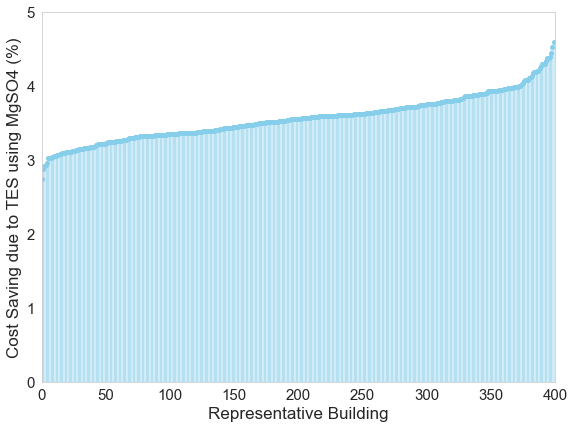

In [8]:
# Graph cost saving due to TES - MgSO4:
fig = plt.subplots(figsize=(9.2,6.8))
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
#ordered_cost = cost_impacts_TES.sort_values(by='Peak Load')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - MgSO4']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using MgSO4 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,5)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_MgSO4
#cost_impacts_TES
diff_all_cost_MgSO4


In [8]:
cost_impacts_TES.min()

building id                 1.000000
total cost - no TES       280.292317
total cost - MgSO4        269.204534
total cost - MgCl2        270.136040
total cost - K2CO3        274.261595
total cost - SrBr2        274.355148
cost saving - MgSO4        11.087784
cost saving % - MgSO4       0.027369
cost saving - MgCl2        10.156278
cost saving % - MgCl2       0.025066
cost saving - K2CO3         6.030722
cost saving % - K2CO3       0.014819
cost saving - SrBr2         5.937169
cost saving % - SrBr2       0.014628
peak load                   2.931349
Peak Load                   2.931349
Load                     4494.552000
Load Factor                 0.164414
MgSO4 Salt Mass            10.421934
MgCl2 Salt Mass            34.580891
K2CO3 Salt Mass            15.750543
SrBr2 Salt Mass             8.243389
dtype: float64

In [9]:
cost_impacts_TES.max()

building id                400.000000
total cost - no TES       3866.092793
total cost - MgSO4        3736.558056
total cost - MgCl2        3747.818042
total cost - K2CO3        3797.200171
total cost - SrBr2        3798.263047
cost saving - MgSO4        129.534737
cost saving % - MgSO4        0.046018
cost saving - MgCl2        118.274752
cost saving % - MgCl2        0.041999
cost saving - K2CO3         68.892622
cost saving % - K2CO3        0.025008
cost saving - SrBr2         67.829746
cost saving % - SrBr2        0.024675
peak load                   30.477053
Peak Load                   30.477053
Load                     63936.968704
Load Factor                  0.280478
MgSO4 Salt Mass            108.356189
MgCl2 Salt Mass            359.535345
K2CO3 Salt Mass            163.757399
SrBr2 Salt Mass             85.705999
dtype: float64

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving - SrBr2,cost saving % - SrBr2,peak load,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,175,176,1789.788837,1740.804727,1744.926449,1763.265136,1763.608552,48.984109,0.027369,44.862388,...,26.180285,0.014628,12.058029,12.058029,29626.383489,0.280478,42.870354,142.247596,64.789448,33.908968
1,23,24,2771.967016,2692.253110,2699.066232,2729.334095,2729.937551,79.713906,0.028757,72.900784,...,42.029465,0.015162,19.827009,19.827009,45955.501327,0.264592,70.491695,233.897632,106.533248,55.756494
2,109,110,1711.873170,1661.877391,1666.155385,1685.014372,1685.425465,49.995779,0.029205,45.717785,...,26.447705,0.015450,12.935849,12.935849,28143.875088,0.248362,45.991300,152.603171,69.506097,36.377529
3,376,377,1773.830596,1721.747064,1726.171284,1745.792811,1746.191241,52.083532,0.029362,47.659312,...,27.639355,0.015582,12.789032,12.789032,29254.578864,0.261127,45.469317,150.871184,68.717229,35.964658
4,114,115,1697.773397,1647.491672,1651.766175,1670.774167,1671.176924,50.281724,0.029616,46.007222,...,26.596473,0.015666,12.811452,12.811452,27837.745800,0.248046,45.549026,151.135667,68.837693,36.027705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,38,39,600.235103,573.973548,576.187947,586.051243,586.241459,26.261554,0.043752,24.047155,...,13.993644,0.023314,6.138928,6.138928,9654.535737,0.179529,21.825957,72.420441,32.985305,17.263577
396,295,296,794.416761,759.661488,762.560804,775.542156,775.812195,34.755273,0.043749,31.855957,...,18.604566,0.023419,8.128407,8.128407,12838.701125,0.180307,28.899225,95.890165,43.675050,22.858288
397,210,211,320.706929,306.432181,307.572287,312.843172,312.941481,14.274748,0.044510,13.134642,...,7.765447,0.024214,3.267824,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606
398,233,234,302.507901,288.808238,289.909399,294.942789,295.043609,13.699663,0.045287,12.598502,...,7.464292,0.024675,3.335892,3.335892,4804.581801,0.164414,11.860219,39.353249,17.924206,9.381024


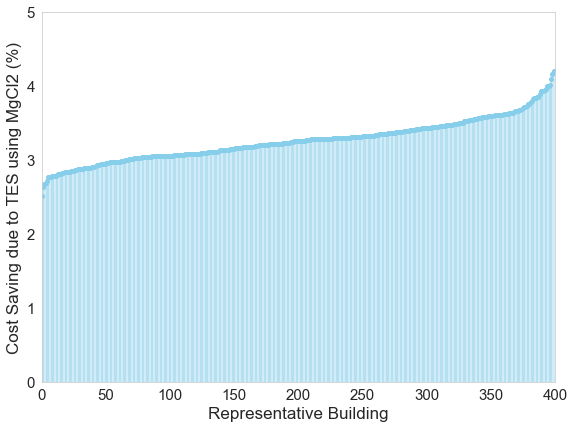

In [9]:
# Graph cost saving due to TES - MgCl2:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgCl2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - MgCl2']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using MgCl2 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,5)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_MgCl2
#cost_impacts_TES
diff_all_cost_MgCl2
ordered_cost

In [41]:
# Dot plot:
ordered_cost_reset = cost_impacts_TES.sort_values(by='peak load')
ordered_cost_reset = ordered_cost_reset.reset_index()
ordered_cost_reset['building'] = ordered_cost_reset.index + 1
ordered_cost_reset

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving % - SrBr2,peak load,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,building
0,304,305,280.292317,261.580114,267.264437,271.679089,266.876510,18.712204,0.066760,13.027880,...,0.047864,2.931349,2.931349,4494.552000,0.175031,10.421934,34.580891,15.750543,8.243389,1
1,210,211,320.706929,300.672282,307.011266,311.810662,306.507735,20.034647,0.062470,13.695663,...,0.044275,3.267824,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606,2
2,233,234,302.507901,283.222046,289.365232,293.961325,288.845602,19.285856,0.063753,13.142669,...,0.045163,3.335892,3.335892,4804.581801,0.164414,11.860219,39.353249,17.924206,9.381024,3
3,338,339,351.177610,330.760965,337.317169,342.138216,336.773996,20.416645,0.058138,13.860441,...,0.041015,3.346160,3.346160,5666.573658,0.193317,11.896726,39.474380,17.979378,9.409899,4
4,99,100,439.196709,417.153966,420.095998,423.575995,424.205772,22.042744,0.050189,19.100711,...,0.034133,4.456120,4.456120,7017.284235,0.179766,15.843009,52.568494,23.943348,12.531272,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,386,3466.234461,3356.380081,3361.390499,3399.616019,3395.321531,109.854381,0.031693,104.843962,...,0.020458,27.341019,27.341019,56719.004778,0.236815,97.206532,322.539805,146.907057,76.887006,396
396,0,1,3526.290877,3411.445667,3416.716507,3456.548849,3452.032423,114.845210,0.032568,109.574370,...,0.021059,27.724174,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495,397
397,4,5,3591.834993,3476.314009,3481.725790,3522.466119,3517.814345,115.520983,0.032162,110.109203,...,0.020608,27.902137,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953,398
398,399,400,3539.585834,3406.903430,3432.746534,3471.909775,3467.473537,132.682405,0.037485,106.839301,...,0.020373,28.411462,28.411462,57919.433045,0.232716,101.012317,335.167735,152.658695,79.897251,399


In [29]:
ordered_cost_reset.mean()

index                      199.500000
building id                200.500000
total cost - no TES       1478.305333
total cost - MgSO4        1380.331476
total cost - MgCl2        1434.462590
total cost - K2CO3        1407.949411
total cost - SrBr2        1406.971060
cost saving - MgSO4         97.973856
cost saving % - MgSO4        0.073749
cost saving - MgCl2         43.842743
cost saving % - MgCl2        0.035289
cost saving - K2CO3         47.605735
cost saving % - K2CO3        0.038264
cost saving - SrBr2         71.334273
cost saving % - SrBr2        0.054465
peak load                   12.540729
Peak Load                   12.540729
Load                     24133.367158
Load Factor                  0.214600
MgSO4 Salt Mass             44.586517
MgCl2 Salt Mass            147.941975
K2CO3 Salt Mass             67.383064
SrBr2 Salt Mass             35.266393
building                   200.500000
dtype: float64

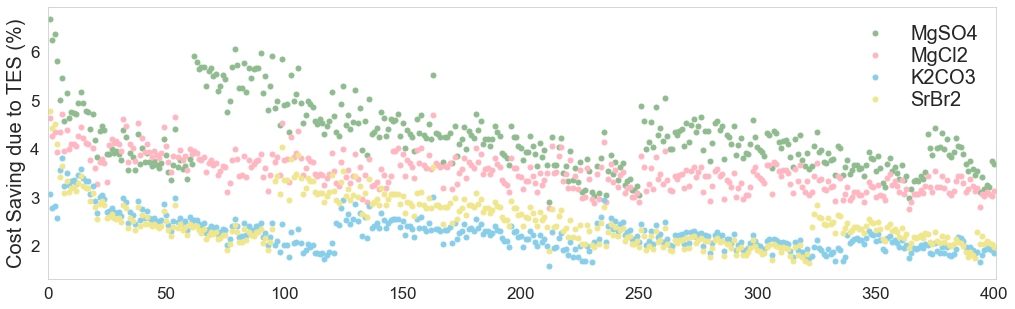

In [43]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - MgSO4']*100, marker='o', ms=5, linestyle='',color = 'darkseagreen', label='MgSO4')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - MgCl2']*100, marker='o', ms=5, linestyle='',color = 'lightpink', label='MgCl2')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - K2CO3']*100, marker='o', ms=5, linestyle='',color = 'skyblue', label='K2CO3')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - SrBr2']*100, marker='o', ms=5, linestyle='',color = 'khaki', label='SrBr2')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
#plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES (%)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, frameon=False, labelspacing=0.15)
if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_pct_all_salts_opt.png', dpi=300, bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_pct_all_salts_var.png', dpi=300, bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_pct_all_salts_fixed.png', dpi=300, bbox_inches='tight')

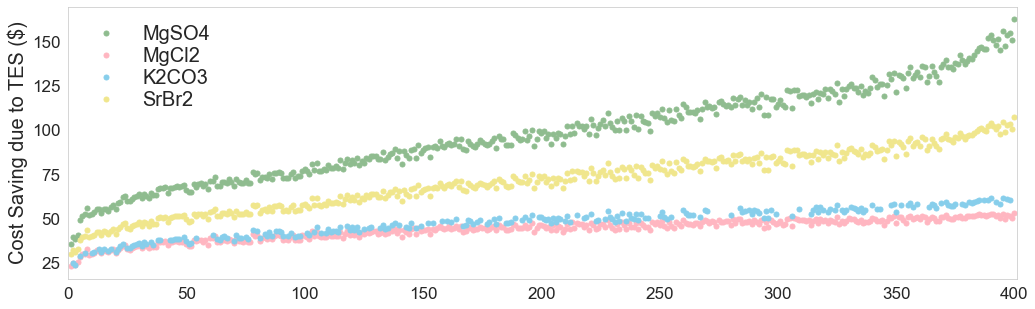

In [36]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - MgSO4'], marker='o', ms=5, linestyle='',color = 'darkseagreen', label='MgSO4')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - MgCl2'], marker='o', ms=5, linestyle='',color = 'lightpink', label='MgCl2')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - K2CO3'], marker='o', ms=5, linestyle='',color = 'skyblue', label='K2CO3')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - SrBr2'], marker='o', ms=5, linestyle='',color = 'khaki', label='SrBr2')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
#plt.xlabel("Representative Home",fontsize=17)
plt.ylabel("Cost Saving due to TES ($)", fontsize=20)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, frameon=False, labelspacing=0.15)
if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_dollars_all_salts.png', dpi=300, bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_dollars_all_salts_var.png', dpi=300, bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_dollars_all_salts_fixed.png', dpi=300, bbox_inches='tight')

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,175,176,1789.788837,1740.804727,1744.926449,1763.265136,1763.608552,48.984109,0.027369,44.862388,...,0.014819,26.180285,0.014628,12.058029,29626.383489,0.280478,42.870354,142.247596,64.789448,33.908968
1,23,24,2771.967016,2692.253110,2699.066232,2729.334095,2729.937551,79.713906,0.028757,72.900784,...,0.015380,42.029465,0.015162,19.827009,45955.501327,0.264592,70.491695,233.897632,106.533248,55.756494
2,109,110,1711.873170,1661.877391,1666.155385,1685.014372,1685.425465,49.995779,0.029205,45.717785,...,0.015690,26.447705,0.015450,12.935849,28143.875088,0.248362,45.991300,152.603171,69.506097,36.377529
3,376,377,1773.830596,1721.747064,1726.171284,1745.792811,1746.191241,52.083532,0.029362,47.659312,...,0.015806,27.639355,0.015582,12.789032,29254.578864,0.261127,45.469317,150.871184,68.717229,35.964658
4,114,115,1697.773397,1647.491672,1651.766175,1670.774167,1671.176924,50.281724,0.029616,46.007222,...,0.015903,26.596473,0.015666,12.811452,27837.745800,0.248046,45.549026,151.135667,68.837693,36.027705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,38,39,600.235103,573.973548,576.187947,586.051243,586.241459,26.261554,0.043752,24.047155,...,0.023631,13.993644,0.023314,6.138928,9654.535737,0.179529,21.825957,72.420441,32.985305,17.263577
396,295,296,794.416761,759.661488,762.560804,775.542156,775.812195,34.755273,0.043749,31.855957,...,0.023759,18.604566,0.023419,8.128407,12838.701125,0.180307,28.899225,95.890165,43.675050,22.858288
397,210,211,320.706929,306.432181,307.572287,312.843172,312.941481,14.274748,0.044510,13.134642,...,0.024520,7.765447,0.024214,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606
398,247,248,952.997902,909.142560,912.973145,929.453198,929.836387,43.855342,0.046018,40.024757,...,0.024706,23.161515,0.024304,10.358133,15468.435279,0.170475,36.826651,122.194060,55.655673,29.128608


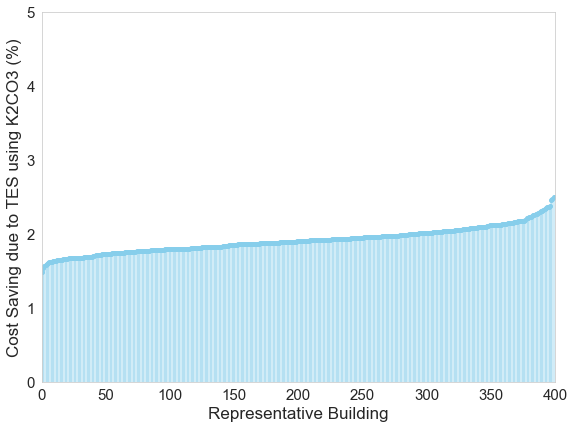

In [10]:
# Graph cost saving due to TES - K2CO3:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - K2CO3')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - K2CO3']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using K2CO3 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,5)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_K2CO3
#cost_impacts_TES
diff_all_cost_K2CO3
ordered_cost

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,175,176,1789.788837,1740.804727,1744.926449,1763.265136,1763.608552,48.984109,0.027369,44.862388,...,0.014819,26.180285,0.014628,12.058029,29626.383489,0.280478,42.870354,142.247596,64.789448,33.908968
1,23,24,2771.967016,2692.253110,2699.066232,2729.334095,2729.937551,79.713906,0.028757,72.900784,...,0.015380,42.029465,0.015162,19.827009,45955.501327,0.264592,70.491695,233.897632,106.533248,55.756494
2,109,110,1711.873170,1661.877391,1666.155385,1685.014372,1685.425465,49.995779,0.029205,45.717785,...,0.015690,26.447705,0.015450,12.935849,28143.875088,0.248362,45.991300,152.603171,69.506097,36.377529
3,376,377,1773.830596,1721.747064,1726.171284,1745.792811,1746.191241,52.083532,0.029362,47.659312,...,0.015806,27.639355,0.015582,12.789032,29254.578864,0.261127,45.469317,150.871184,68.717229,35.964658
4,114,115,1697.773397,1647.491672,1651.766175,1670.774167,1671.176924,50.281724,0.029616,46.007222,...,0.015903,26.596473,0.015666,12.811452,27837.745800,0.248046,45.549026,151.135667,68.837693,36.027705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,38,39,600.235103,573.973548,576.187947,586.051243,586.241459,26.261554,0.043752,24.047155,...,0.023631,13.993644,0.023314,6.138928,9654.535737,0.179529,21.825957,72.420441,32.985305,17.263577
396,295,296,794.416761,759.661488,762.560804,775.542156,775.812195,34.755273,0.043749,31.855957,...,0.023759,18.604566,0.023419,8.128407,12838.701125,0.180307,28.899225,95.890165,43.675050,22.858288
397,210,211,320.706929,306.432181,307.572287,312.843172,312.941481,14.274748,0.044510,13.134642,...,0.024520,7.765447,0.024214,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606
398,247,248,952.997902,909.142560,912.973145,929.453198,929.836387,43.855342,0.046018,40.024757,...,0.024706,23.161515,0.024304,10.358133,15468.435279,0.170475,36.826651,122.194060,55.655673,29.128608


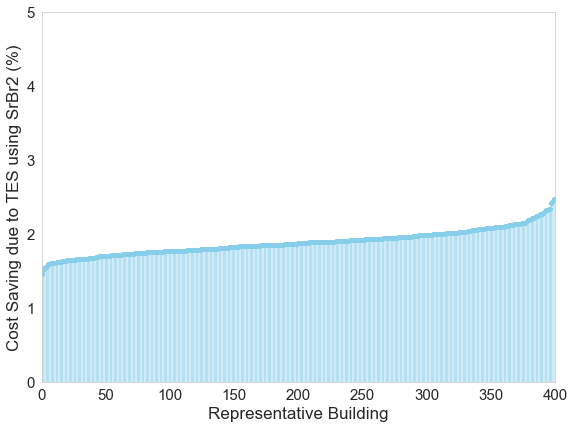

In [11]:
# Graph cost saving due to TES - SrBr2:
fig = plt.subplots(figsize=(9.2,6.8))
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - SrBr2')
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - SrBr2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - SrBr2']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using SrBr2 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,5)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_SrBr2
#cost_impacts_TES
diff_all_cost_SrBr2
ordered_cost